## Support Vector Machine Classification

sklearn support vector machine documentations:

- [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC): Implements different kernels of SVM classifier using `libsvm`.
- [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC): Implements linear SVC with `liblinear`.
- [SVM user guide](https://scikit-learn.org/stable/modules/svm.html#unbalanced-problems)


### Plot classification boundaries with different SVM Kernels

This example shows how different kernels in a SVC (Support Vector Classifier) influence the classification boundaries in a binary, two-dimensional classification problem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
X = np.array(
    [
        [0.4, -0.7],
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

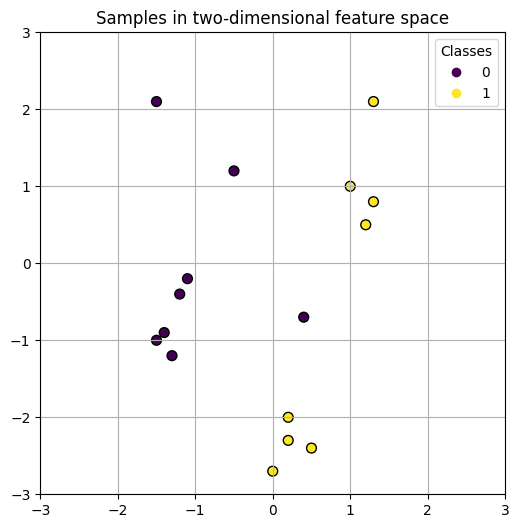

In [3]:
# Plotting settings
fig, ax = plt.subplots(figsize=(6, 6))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=50, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
plt.grid()
plt.show()

In [4]:
def plot_training_data_with_decision_boundary(kernel, C=1.0, gamma='auto', ax=None, long_title=True, support_vectors=True):
    
    # Train the SVC
    clf = svm.SVC(C=C, kernel=kernel, gamma=gamma).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

### Linear Kernel

Linear kernel is the dot product of the input samples:

$$ K(\vec{x_1}, \vec{x_2}) = \vec{x_1}^T \vec{x_2} $$

It is then applied to any combination of two data points (samples) in the dataset. The higher the value, the more similar the points are.

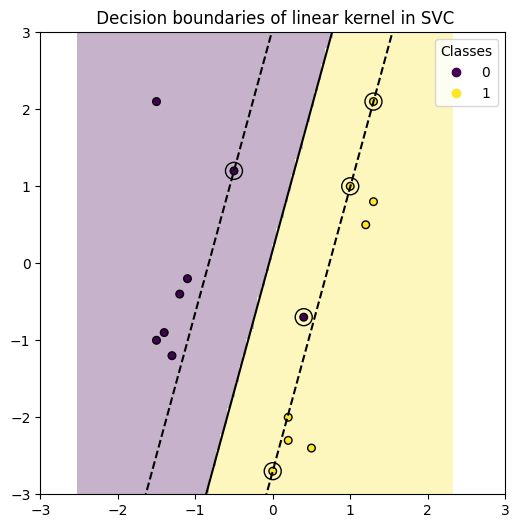

In [10]:
plot_training_data_with_decision_boundary("linear", C=1)

### Polynomial kernel

The kernel function is defined as:

$$K(\vec{x_1}, \vec{x_2}) = (\gamma \cdot \vec{x_1}^T \vec{x_2} + r)^d $$

where $d$ is the degree (degree) of the polynomial, $\gamma$ (gamma) controls the influence of each individual training sample on the decision boundary and 
$r$ is the bias term that shifts the data up or down. 

Here, we use the default value for the degree of the polynomial in the kernel function (degree=3). When $r=0$ (the default), the data is only transformed, but no additional dimension is added. 

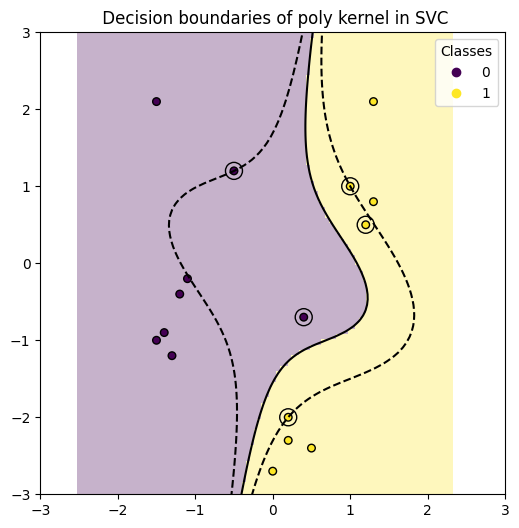

In [16]:
plot_training_data_with_decision_boundary(kernel="poly", C=1.0)

### RBF Kernel

The radial basis function (RBF) kernel, also known as the Gaussian kernel, is the default kernel for Support Vector Machines in scikit-learn. he kernel function is defined as:

$$K(\vec{x_1}, \vec{x_2}) = exp(-\gamma \cdot \|\vec{x_1} - \vec{x_2}\|^2) $$

where $\gamma$(gamma) controls the influence of each individual training sample on the decision boundary.

The larger the euclidean distance between two points $\|\vec{x_1} - \vec{x_2}\|^2$ the closer the kernel function is to zero. This means that two points far away are more likely to be dissimilar.

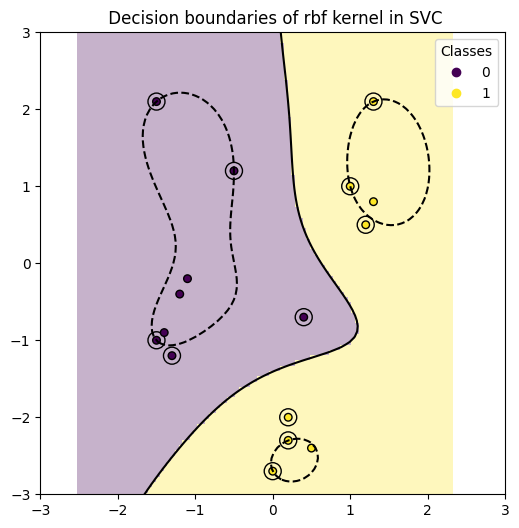

In [17]:
plot_training_data_with_decision_boundary("rbf", C=1.0, gamma='auto')

In the plot we can see how the decision boundaries tend to contract around data points that are close to each other.

### Sigmoid Kernel

The sigmoid kernel function is defined as:

$$K(\vec{x_1}, \vec{x_2}) = tanh(\gamma \cdot \vec{x_1}^T \vec{x_2} + r) $$

where the kernel coefficient $\gamma$(gamma) controls the influence of each individual training sample on the decision boundary and $r$ is the bias term (coef0) that shifts the data up or down.

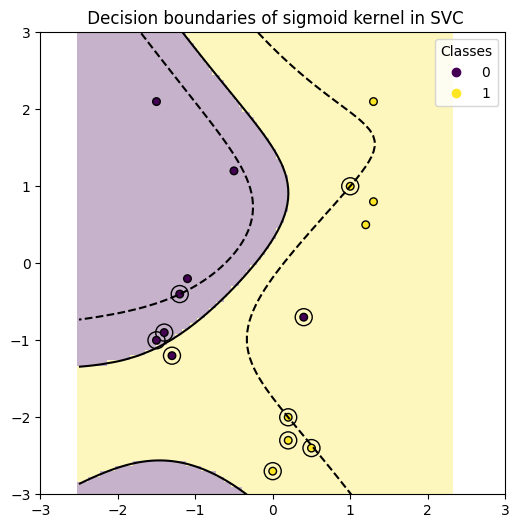

In [18]:
plot_training_data_with_decision_boundary("sigmoid", C=1)

We can see that the decision boundaries obtained with the sigmoid kernel appear curved and irregular. The decision boundary tries to separate the classes by fitting a sigmoid-shaped curve, resulting in a complex boundary that may not generalize well to unseen data. 

From this example it becomes obvious, that the sigmoid kernel has very specific use cases, when dealing with data that exhibits a sigmoidal shape. In this example, careful fine tuning might find more generalizable decision boundaries. Because of its specificity, the sigmoid kernel is less commonly used in practice compared to other kernels.

----------------

## Plot different SVM classifiers in the iris dataset

Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:

- Sepal length

- Sepal width

This example shows how to plot the decision surface for four SVM classifiers with different kernels.

In [19]:
# import iris data
iris = datasets.load_iris()

# Take the first two features for visualization
X = iris.data[:, :2]
y = iris.target

In [20]:
# we create an instance of SVM and fit out data. 
# We do not scale our data since we want to plot the support vectors

C = 1.0  # SVM regularization parameter

models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

models = (clf.fit(X, y) for clf in models)

In [21]:
# title for the plots

titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

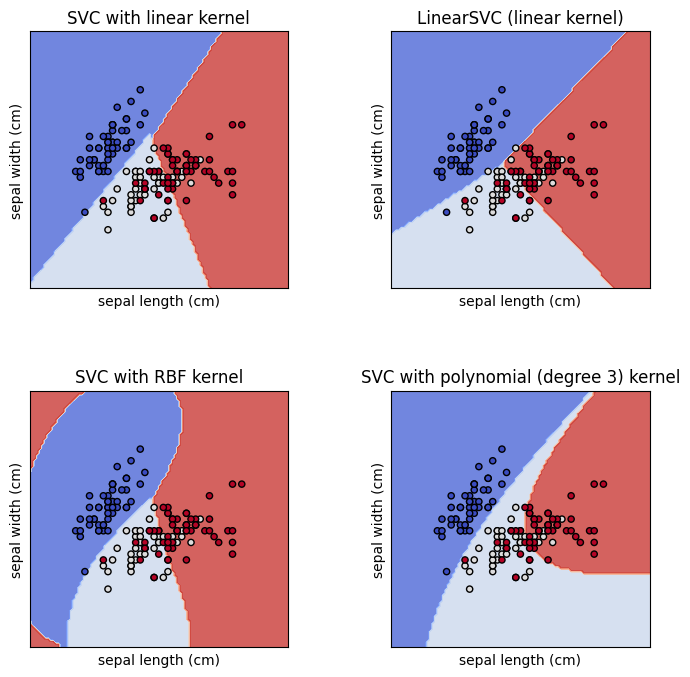

In [22]:
# Set-up 2x2 grid for plotting.

fig, sub = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

The linear models `LinearSVC()` and `SVC(kernel='linear')` yield slightly different decision boundaries. This can be a consequence of the following differences:

- `LinearSVC` minimizes the squared hinge loss while `SVC` minimizes the regular hinge loss.

- LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.